In [1]:
%matplotlib inline

import random
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

### Load MNIST

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


#### 인풋 데이터 및 레이블 정의

In [3]:
inps = tf.placeholder(tf.float32, [None, 784])
labels = tf.placeholder(tf.float32, [None, 10])

## 아래 그림과 같은 2-layer Neural Network를 정의해봅시다.
#### 2-layer NN
 - 아래 그림에서 $k=10$으로 정의
 - 첫 번째 레이어: 784-dimension의 인풋 데이터를 10-dimension으로 변환
 - 두 번째 레이어: 10-dimension의 hidden layer의 데이터를 10개의 레이블에 대한 확률값으로 변환 

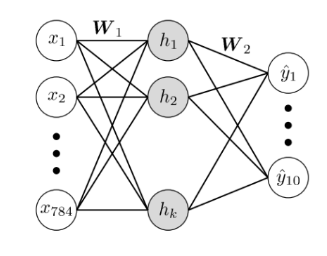

In [2]:
img = Image.open("../resource/multi_layer_NN.png")
plt.imshow(img)
plt.axis("off"); plt.show()

### Problem 1
  - hidden layer 추가
  - 아래 두 셀을 작성 후, "모델 성능 확인" 부분을 실행하시면 됩니다.

In [4]:
# TODO: 첫번째 레이어 구현 (784dim -> 10dim)
# 아래 변수들을 정의하세요.
weight_1 = 
bias_1 = 
hidden_1 = 

In [5]:
# TODO: 첫번째 레이어 구현 (10dim -> 10dim)
weight_2 = 
bias_2 = 
hidden_2 = 

### Problem 2
  - linear layer 함수 구현
  - 아래 두 셀을 작성 후, "모델 성능 확인"를 실행하시면 됩니다.

In [6]:
# TODO: inp-dim의 인풋 값을 out-dim의 값으로 변환하는 linear layer 함수 구현
def linearLayer(inp, inp_dim, out_dim):
    """ Linear 연산, 
    Args:
        inp: 인풋 데이터 (batch_size, inp_dim)
        inp_dim: 인풋 데이터의 크기
        out_dim: hidden layer의 크기
    Returns:
        out: linear layer를 통과한 값 (batch_size, out_dim)
    """
    
    # 아래 변수들을 정의하세요.
    weight = 
    bias = 
    out =  
    return out

In [7]:
# TODO: LinearLayer 함수를 이용해서 아래 변수를 정의하세요.
hidden_1 = 
hideen_2 = 

### 모델 성능 확인
  - 약 11%로 성능이 떨어짐

In [10]:
# loss 및 optimizer 정의
pred = tf.nn.softmax(hidden_2)
cross_entropy = tf.reduce_mean(-tf.reduce_sum(labels * tf.log(pred), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
# 정확도 정의
correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [11]:
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(15):
        total_cost = 0

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # 이미지 데이터를 CNN 모델을 위한 자료형태인 [28 28 1] 의 형태로 재구성합니다.
            _, cost_val = sess.run([train_step, cross_entropy], \
                                   feed_dict={inps: batch_xs, labels: batch_ys})
            total_cost += cost_val

        print "Epoch:", "%02d" % (epoch + 1), \
            "Avg. cost =", '{:.3f}'.format(total_cost / total_batch)

    # 테스트 데이터에 대한 정확도
    print "Test Accuracy: ", sess.run(accuracy, \
                    feed_dict={inps: mnist.test.images, labels: mnist.test.labels})

Epoch: 0001 Avg. cost = 2.302
Epoch: 0002 Avg. cost = 2.302
Epoch: 0003 Avg. cost = 2.301
Epoch: 0004 Avg. cost = 2.301
Epoch: 0005 Avg. cost = 2.301
Epoch: 0006 Avg. cost = 2.301
Epoch: 0007 Avg. cost = 2.301
Epoch: 0008 Avg. cost = 2.301
Epoch: 0009 Avg. cost = 2.301
Epoch: 0010 Avg. cost = 2.301
Epoch: 0011 Avg. cost = 2.301
Epoch: 0012 Avg. cost = 2.301
Epoch: 0013 Avg. cost = 2.301
Epoch: 0014 Avg. cost = 2.301
Epoch: 0015 Avg. cost = 2.301
Test Accuracy:  0.1135
